# Polinomial Regression
Polynomial Regression is used when the data doesn’t follow a straight line, but instead follows a curved (non-linear) pattern.

It transforms the original features into polynomial features (like 𝑥^2,𝑥^3 etc.) so that a linear model can fit a curve.

Step 1 Datasets
| Hours | Marks |
| ----- | ----- |
| 1     | 45    |
| 2     | 50    |
| 3     | 55    |
| 4     | 65    |
| 5     | 75    |
| 6     | 78    |
| 7     | 79    |
| 8     | 76    |


Step 2 Code for Polynomial Regression 

In [3]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # We will use this function to get features like 𝑥^2,𝑥^3


In [2]:
# Step 2: Dataset
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8],
    'Marks': [45, 50, 55, 65, 75, 78, 79, 76]
}

In [4]:
df = pd.DataFrame(data)

In [5]:
X = df[['Hours']]      # Input must be 2D
y = df['Marks']

In [6]:
# Step 3: Transform to polynomial features degree 2
poly = PolynomialFeatures(degree=2)  # for x^2
X_poly = poly.fit_transform(X)


In [7]:
# Step 4: Train model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [8]:
# Step 5: Predict new values
x_test = np.array([[9]])
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)
print(f"Predicted marks for 9 hours: {y_pred[0]:.2f}")


Predicted marks for 9 hours: 78.02


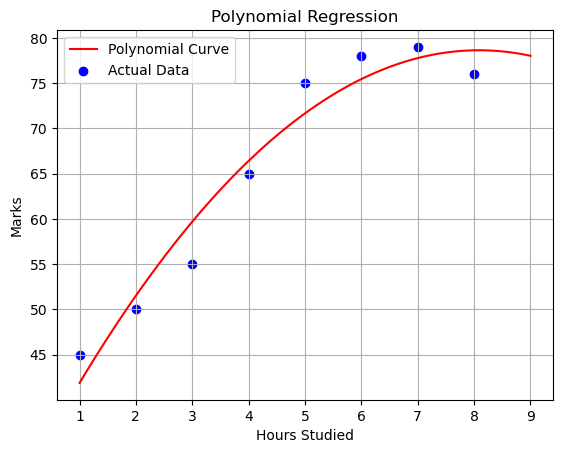

In [17]:
# Step 6: Plot
plt.scatter(X, y, color='blue', label='Actual Data') # we see dot dot using scatter plot :)
X_range = np.linspace(1, 9, 100).reshape(-1, 1)  # this is intresting reshape(-1, 1) this will change to 2 d array
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Curve')

plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


# Explain Under fitting, Over fitting and Balanced

| Term             | Meaning                                                                        |
| ---------------- | ------------------------------------------------------------------------------ |
| **Underfitting** | Model is **too simple**, misses important patterns (low training accuracy)     |
| **Overfitting**  | Model is **too complex**, memorizes training data, performs poorly on new data |
| **Balanced**     | Model generalizes well: good performance on both training and test data        |


### Example Scenario (using Regression)
1. Linear Regression → a straight line (simple model)
2. Polynomial Regression (degree=10) → a wiggly curve (very complex model)

| Condition         | Training Error | Testing Error | What It Means          |
| ----------------- | -------------- | ------------- | ---------------------- |
| Underfitting      | High           | High          | Model is too simple    |
| Overfitting       | Low            | High          | Model memorized noise  |
| Balanced/Good Fit | Low            | Low           | Model generalizes well |

Note: Error could be measured using MSE (for regression), or R² score.

In [3]:
# Using R^2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

# Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([45, 50, 55, 65, 75, 78, 79, 76, 74])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("Train R²:", r2_score(y_train, y_train_pred_lr))
print("Test  R²:", r2_score(y_test, y_test_pred_lr))

# Try Polynomial Regression (degree 5)
poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

pr = LinearRegression()
pr.fit(X_poly_train, y_train)

y_train_pred_pr = pr.predict(X_poly_train)
y_test_pred_pr = pr.predict(X_poly_test)

print("\nPolynomial Regression (degree=5):")
print("Train R²:", r2_score(y_train, y_train_pred_pr))
print("Test  R²:", r2_score(y_test, y_test_pred_pr))


Linear Regression:
Train R²: 0.7569388920616792
Test  R²: 0.8306808297089326

Polynomial Regression (degree=5):
Train R²: 1.0
Test  R²: 0.9669859839271926


In [4]:
# Using MSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Create sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([45, 50, 55, 65, 75, 78, 79, 76, 74])

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"\n{model_name}")
    print(f"Train MSE: {mse_train:.2f}")
    print(f"Test  MSE: {mse_test:.2f}")
    
# Step 3: Linear Regression (Underfitting?)
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test)

# Step 4: Polynomial Regression (degree 2 → Balanced?)
poly2 = PolynomialFeatures(degree=2)
X_poly2_train = poly2.fit_transform(X_train)
X_poly2_test = poly2.transform(X_test)

pr2 = LinearRegression()
pr2.fit(X_poly2_train, y_train)
evaluate_model("Polynomial Regression (degree=2)", pr2, X_poly2_train, y_train, X_poly2_test, y_test)

# Step 5: Polynomial Regression (degree 10 → Overfitting?)
poly10 = PolynomialFeatures(degree=10)
X_poly10_train = poly10.fit_transform(X_train)
X_poly10_test = poly10.transform(X_test)

pr10 = LinearRegression()
pr10.fit(X_poly10_train, y_train)
evaluate_model("Polynomial Regression (degree=10)", pr10, X_poly10_train, y_train, X_poly10_test, y_test)



Linear Regression
Train MSE: 35.47
Test  MSE: 27.54

Polynomial Regression (degree=2)
Train MSE: 9.19
Test  MSE: 5.09

Polynomial Regression (degree=10)
Train MSE: 0.00
Test  MSE: 4723.33


### Conclusion

#### Linear Regression
- Train R²: 0.76
- Test R²: 0.83
- Train MSE: 35.47
- Test MSE: 27.54

#### Polynomial Regression (degree = 2)
- Train MSE: 9.19
- Test MSE: 5.09

#### Polynomial Regression (degree = 5 / 10)
- Train R²: 1.00
- Test R²: 0.97
- Train MSE: 0.00
- Test MSE: 4723.33


#### Linear Regression – Slight Underfitting or Balanced
- R² is decent (especially Test R² = 0.83 is better than Train).
- But MSE values are relatively high → indicates it may be too simple.
- Conclusion: Acceptable, but not optimal. Slight underfit.

#### Polynomial Regression (degree = 2) – Balanced
- Test MSE is low (5.09), close to Train MSE (9.19).
- R² is likely in the 0.95+ range based on the error values.
- Conclusion: This is the best generalizing model on your dataset.

#### Polynomial Regression (degree = 10) – Severe Overfitting
- Train R² = 1.0 → perfect fit (memorized the training data).
- Train MSE = 0.00 → zero error on training.
- Test MSE = 4723.33 → sky-high error on new data.
- Conclusion: Model memorized the noise, failed to generalize.

# Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a cost function by updating model parameters (like coefficients) step-by-step in the right direction.

It helps your model learn the best parameters by reducing the error (e.g., MSE for regression).

### Why Do We Use Gradient Descent?
Because in most ML problems, we:
- Don’t know the best weights (coefficients) beforehand.
- Can’t solve them easily with formulas (especially for complex models like neural networks).
- Need an iterative method to find the best values that minimize the error.

In simple models (like Linear Regression), we can use a formula. In large models (like deep neural networks), Gradient Descent is essential.


### How Does Gradient Descent Work?
- Imagine you're on a mountain trying to walk downhill (toward the lowest point of error).
- Steps:
    - Start with random values for coefficients (slope, intercept).
    - Calculate the cost (error between predicted vs actual).
    - Find the gradient (slope of the cost curve).
    - Update the coefficients in the opposite direction of the gradient.
    - Repeat until you reach the lowest point (minimum error).

### Where Can We Use Gradient Descent?

| Use Case                                   | Why Gradient Descent is Needed            |
| ------------------------------------------ | ----------------------------------------- |
| **Linear Regression**                      | When using many features                  |
| **Logistic Regression**                    | No direct formula → need to minimize cost |
| **Neural Networks / Deep Learning**        | Millions of weights → only GD works       |
| **Support Vector Machines**                | Optimization-based learning               |
| **Any ML algorithm that minimizes a loss** | Gradient Descent is applicable            |


### How Can We Use It (In Practice)?
- In libraries like TensorFlow, PyTorch, or even Scikit-Learn, gradient descent is used automatically under the hood.
- Practical Example


In [12]:
# Gradient Descent for Linear Regression (1 feature)
import numpy as np
# Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 9, 12, 15])  # Perfect linear: y = 3x

# Initialize parameters
m = 0
c = 0
learning_rate = 0.01
epochs = 1000
n = len(X)

# Gradient Descent Loop
for i in range(epochs):
    y_pred = m * X + c
    error = y - y_pred
    
    dm = (-2/n) * sum(X * error)
    db = (-2/n) * sum(error)
    
    m = m - learning_rate * dm
    c = c - learning_rate * db

print(f"Final model: y = {m:.2f}x + {c:.2f}")


Final model: y = 2.99x + 0.03


- Above code trains a linear regression model using gradient descent to learn the best-fit line.
- It starts with random values `(m = 0, c = 0)` and iteratively updates them to reduce the error between predicted and actual values.
- m = 0
    - Initial slope of the line
    - Model starts with zero slope (a flat line)
    - During training, gradient descent will adjust this value closer to 3 (the true slope)
- c = 0
    - Initial intercept of the line
    - The model starts with the line passing through origin (0,0)
    - Gradient descent adjusts this too — although for y = 3x it should remain 0 in the end.
- learning_rate = 0.01
    - Controls how big the steps are during optimization.
    - If it's too high, you might skip over the minimum or diverge.
    - If it's too small, training will be very slow.
    - 0.01 is a common starting point for simple problems.

Analogy: It’s like walking down a hill — learning_rate controls how big each step is.

- epochs = 1000
    - The number of training iterations.
    - In each iteration, the model:
       - Predicts values.
       - Calculates errors.
       - Computes gradients (slopes of the cost function).
       - Updates m and c.

The more epochs, the better the model converges (up to a point).

- n = len(X)
    - Number of data points (here, 5)
    - Used to compute the mean in the gradient formula
    - Prevents gradient values from being too large




# Learning Rate
- The Learning Rate (α) is a hyperparameter that controls how big a step gradient descent takes in each iteration while moving toward the minimum of the cost function.
- In other words, how fast your model adjusts its parameters (m and c) to minimize error in case of linear regression.
- Gradent decent updated formula

$$
\theta = \theta - \alpha \cdot \frac{\partial J}{\partial \theta}
$$


| Symbol                                 | Meaning                                                       |
| :------------------------------------- | :------------------------------------------------------------ |
| $$\theta$$                             | Model parameter (e.g. m  or c )                               |
| $$\alpha$$                             | Learning rate (step size for updates)                         |
| $$\frac{\partial J}{\partial \theta}$$ | Gradient (slope of the cost function $$\partial J$$ w.r.t.   $$\theta$$  |


### Why Do We Use a Learning Rate?
Because we don’t want our model to:
- Jump too far and overshoot the minimum (if α is too large), or
- Move too slowly and take forever to reach the minimum (if α is too small).

It helps find a balance between speed and accuracy when minimizing the cost function.

### How it works

We’re trying to fit:

```
y=mx+c
```

We’ll use Gradient Descent to find the best m (slope) and c (constant).
We’ll try three different learning rates:
- Too small: slow learning
- Just right: smooth convergence
- Too large: unstable / diverging

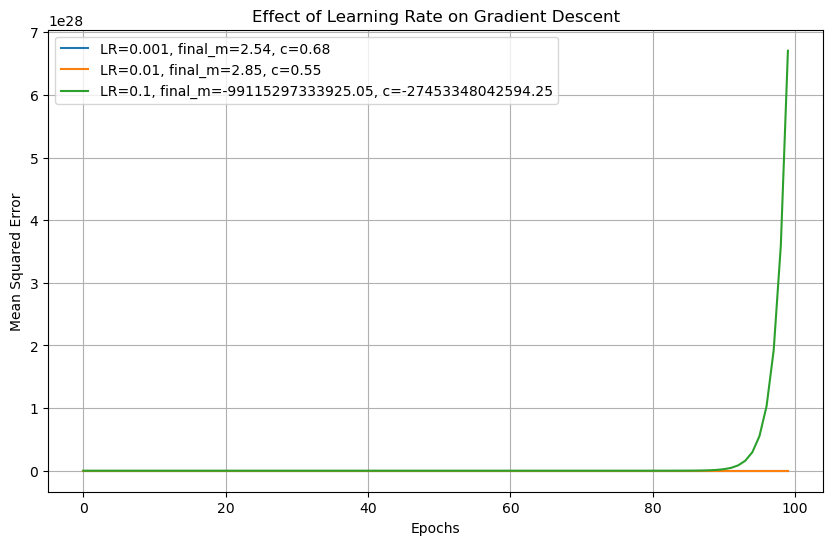

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Sample Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 9, 12, 15])   # Perfect relation y = 3x

# Step 2: Gradient Descent Function
def gradient_descent(X, y, lr, epochs):
    m = 0
    c = 0
    n = len(X)
    mse_list = []  # store mean squared error for each iteration
    
    for i in range(epochs):
        y_pred = m * X + c
        error = y - y_pred

        dm = (-2/n) * np.sum(X * error)
        dc = (-2/n) * np.sum(error)
        
        m = m - lr * dm
        c = c - lr * dc
        
        mse = np.mean(error**2)
        mse_list.append(mse)
    
    return m, c, mse_list

# Step 3: Try different learning rates
learning_rates = [0.001, 0.01, 0.1]
epochs = 100

plt.figure(figsize=(10,6))

for lr in learning_rates:
    m, c, mse_history = gradient_descent(X, y, lr, epochs)
    plt.plot(mse_history, label=f'LR={lr}, final_m={m:.2f}, c={c:.2f}')

# Step 4: Plot results
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


### Types of Gradient Decent


| Type                                                                       | Data Used Per Update                                          | Description                                                                             | Pros                                  | Cons                         |
| -------------------------------------------------------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------------- | ------------------------------------- | ---------------------------- |
| **Batch Gradient Descent** (sometimes called **Generic Gradient Descent**) | Uses **all training samples** to compute the gradient         | Computes the exact gradient of the cost function using the **entire dataset** each time | Stable, accurate updates              | Very slow for large datasets |
| **Stochastic Gradient Descent (SGD)**                                      | Uses **one random sample** at a time                          | Updates model parameters after each training example                                    | Faster, works well with large data    | Noisy updates, less stable   |
| **Mini-Batch Gradient Descent**                                            | Uses a **small batch** (e.g., 32, 64, 128 samples) per update | A balance between batch and stochastic methods                                          | Fast, efficient, smoother convergence | Needs tuning of batch size   |


#### Example
Let’s say you have 1000 data points.

1. Batch Gradient Descent: Calculates gradient using all 1000 → 1 update per epoch.
2. Stochastic Gradient Descent: Calculates gradient using 1 data point at a time → 1000 updates per epoch.
3. Mini-Batch (e.g., 100 samples): Calculates gradient using 100 samples → 10 updates per epoch.